- FP és CFP értékek legynek meg konrkétan a beszámított srlgk-re
- Lehetne, azt hogy csak azok a srlg(élhalmaz) érdekelnek amiknek x th felett van a CFP-je - olyan példát kellene keresni ahol a th feletti mindegyik srlg-re igaz az, hogy az srlg minden éle egy csucsra illeszkedik(összefüggöek/kapcsoltak)
- azok az élek amiknek nincs FP értéke az 0-t kap pl.: aminek nagyobb az átmérüjük, nincs rá srlg 

**!!! A E-FRADIR cikk alapján a PSRLG az egyenlő a CFP-vel, 7. és 8. ábra feliratai !!!**



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import copy
import itertools

from backend import *
from process import get_srlg_cfp, get_st_graph

In [4]:
network = 'usa_995'

srlgs, srlg_probs = get_SRLGs(f'PSRLGs/{network}.xml')
srlg_probs = np.asarray(srlg_probs)
srlg_lengths = np.asarray([len(srlg) for srlg in srlgs])

g_base = nx.read_gml(f'networks/{network}.gml', label="id")
pos = {node:(g_base.nodes[node]['Longitude'], g_base.nodes[node]['Latitude']) for node in g_base.nodes}

g_dual = nx.line_graph(g_base)
pos_dual = {node:(
                    (g_base.nodes[node[0]]["Longitude"] + g_base.nodes[node[1]]["Longitude"]) /2, 
                    (g_base.nodes[node[0]]["Latitude"] + g_base.nodes[node[1]]["Latitude"]) /2
                )
            for node in g_dual.nodes()
            }

In [7]:
-np.log(1)

-0.0

In [5]:
[list(srlg)[0] for srlg in srlgs if len(srlg) == 1]

[(1, 4, 0),
 (1, 2, 0),
 (18, 20, 0),
 (18, 19, 0),
 (4, 18, 0),
 (2, 4, 0),
 (19, 20, 0),
 (20, 24, 0),
 (20, 22, 0),
 (17, 19, 0),
 (14, 19, 0),
 (9, 19, 0),
 (2, 9, 0),
 (2, 5, 0),
 (22, 24, 0),
 (23, 24, 0),
 (21, 22, 0),
 (5, 9, 0),
 (0, 5, 0),
 (9, 12, 0),
 (23, 25, 0),
 (21, 23, 0),
 (15, 17, 0),
 (10, 17, 0),
 (14, 21, 0),
 (14, 15, 0),
 (0, 8, 0),
 (0, 7, 0),
 (10, 12, 0),
 (10, 15, 0),
 (10, 13, 0),
 (21, 25, 0),
 (15, 16, 0),
 (12, 13, 0),
 (8, 12, 0),
 (6, 7, 0),
 (3, 7, 0),
 (8, 11, 0),
 (6, 8, 0),
 (13, 16, 0),
 (11, 13, 0),
 (3, 6, 0)]

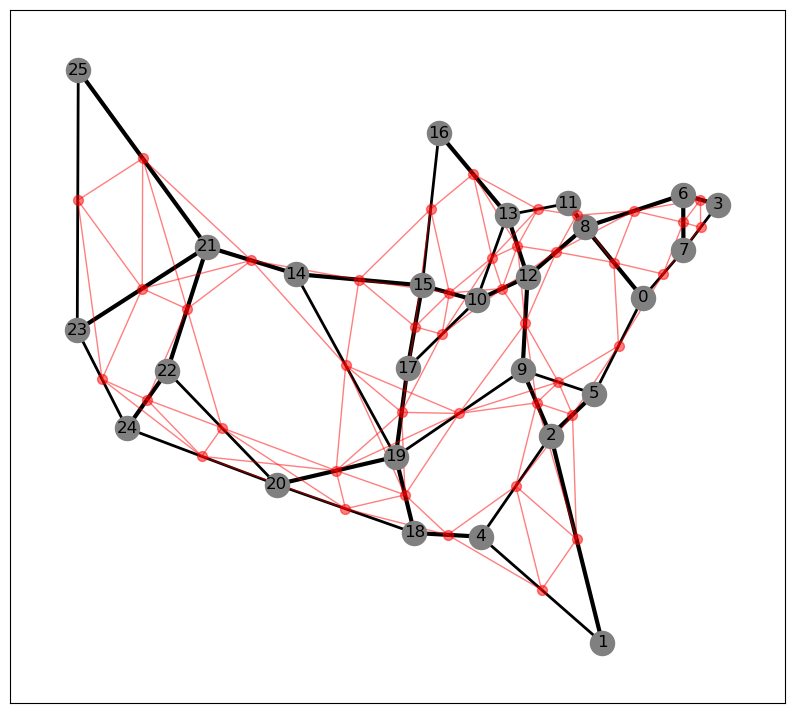

In [37]:
fig,ax = plt.subplots(figsize=(10,9))

options = {
    'node_size': 300,
    'node_color': 'gray',
    'width': [2+1*g_base.edges[edge]['onspine'] for edge in g_base.edges],
}

nx.draw_networkx(g_base, pos, ax, **options)
nx.draw_networkx(g_dual, pos_dual, with_labels=False, node_size = 50, edge_color = "red", node_color = "red", alpha = 0.5)

In [38]:
g_dual_st, pos_dual_st = get_st_graph(g_base, srlgs, srlg_probs, g_dual, pos_dual, 20, 2)

node_color_list = [j["c"] for i,j in g_dual_st.nodes(data=True)]
edge_color_list = [k["c"] for i,j,k in g_dual_st.edges(data=True)]  

In [39]:
# s = 13
# t = 14

# g_dual_st = copy.deepcopy(g_dual)
# pos_dual_st = copy.deepcopy(pos_dual)

# nx.set_node_attributes(g_dual_st, "red", "c")
# nx.set_edge_attributes(g_dual_st, "red", "c")

# edges_for_s = [i for i in g_dual_st.nodes() if s in i[:2]]
# edges_for_t = [i for i in g_dual_st.nodes() if t in i[:2]]

# g_dual_st.add_node("Start", c = "blue")
# for pe in edges_for_s:
#     g_dual_st.add_edge("Start", pe, c = "blue")

# g_dual_st.add_node("Target", c = "green")
# for pe in edges_for_t:
#     g_dual_st.add_edge("Target", pe, c = "green")


# pos_dual_st.update({"Start":(g_base.nodes[s]["Longitude"], g_base.nodes[s]["Latitude"])})
# pos_dual_st.update({"Target":(g_base.nodes[t]["Longitude"], g_base.nodes[t]["Latitude"])})

# node_color_list = [j["c"] for i,j in g_dual_st.nodes(data=True)]
# edge_color_list = [k["c"] for i,j,k in g_dual_st.edges(data=True)]

# ### Calculate cost of the dual edges ###
# edge_cost_dict = {}
# for f, g,_ in g_dual_st.edges(keys=True):
#     if f in ["Start", "Target"]:
#         e_cfp = get_srlg_cfp(srlgs, srlg_probs, {g})
#         cost = 0.5*e_cfp
#     elif g in ["Start", "Target"]:
#         e_cfp = get_srlg_cfp(srlgs, srlg_probs, {f})
#         cost = 0.5*e_cfp
#     else:
#         f_cpf = get_srlg_cfp(srlgs, srlg_probs, {f})
#         g_cpf = get_srlg_cfp(srlgs, srlg_probs, {g})
        
#         if {f,g} in srlgs:
#             fg_cfp = get_srlg_cfp(srlgs, srlg_probs, {f,g})
#             cost = (0.5*f_cpf) + (0.5*g_cpf) - fg_cfp
#         else:
#             cost = 0
#     edge_cost_dict.update({(f,g,0):cost})

# nx.set_edge_attributes(g_dual_st, edge_cost_dict, "cost")

In [40]:
len([v["cost"] for f,g,v in g_dual_st.edges(data=True) if v["cost"] == 0]) / g_dual_st.number_of_edges()

0.0

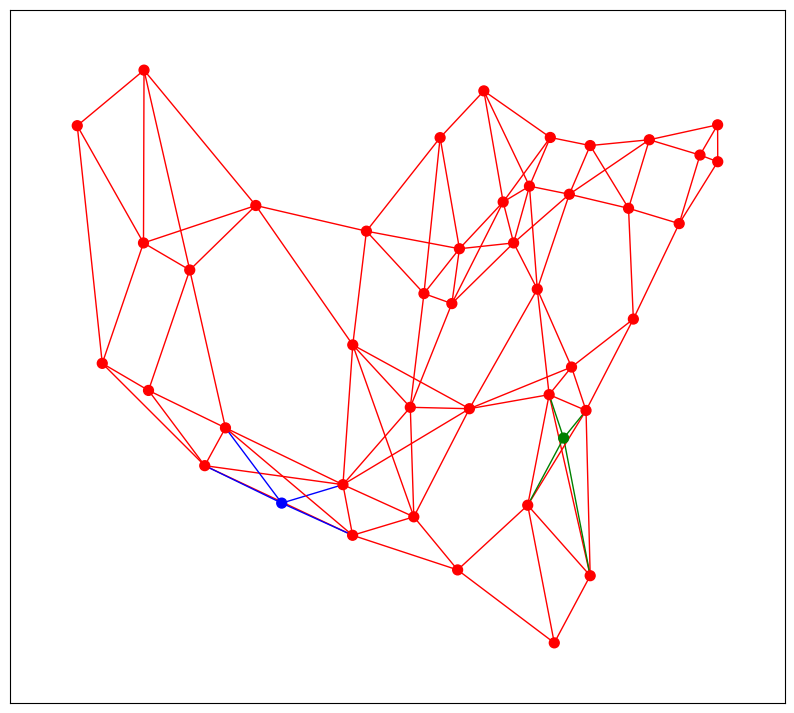

In [41]:
fig,ax = plt.subplots(figsize=(10,9))
nx.draw_networkx(g_dual_st, pos_dual_st, with_labels=False, node_size = 50, edge_color = edge_color_list, node_color = node_color_list)
plt.show()

In [42]:
djk_path = nx.dijkstra_path(g_dual_st, "Start", "Target", weight="cost")

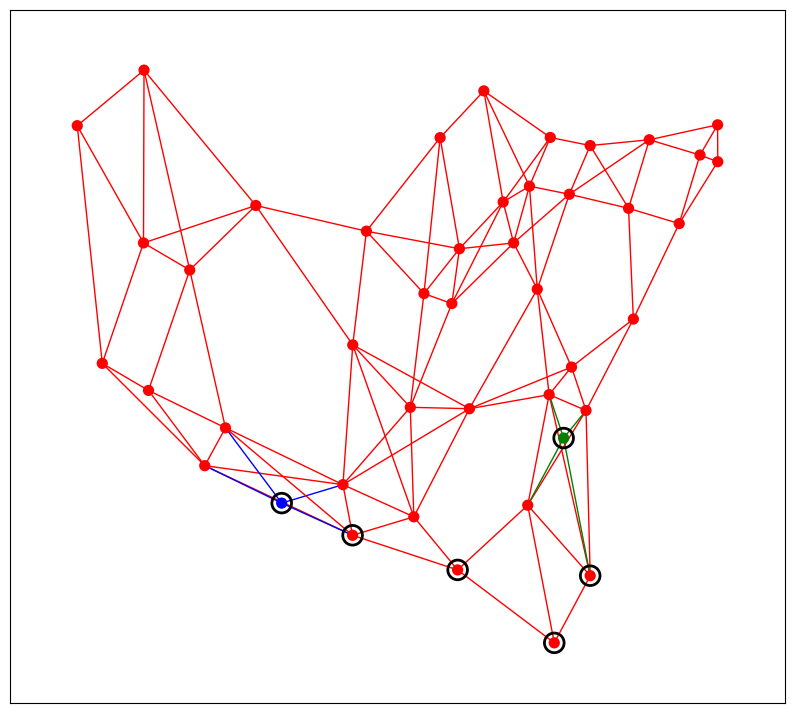

In [43]:
fig,ax = plt.subplots(figsize=(10,9))
nx.draw_networkx(g_dual_st, pos_dual_st, with_labels=False, node_size = 50, edge_color = edge_color_list, node_color = node_color_list)

for path_node in djk_path:
    plt.scatter(pos_dual_st[path_node][0], pos_dual_st[path_node][1], facecolors='none', edgecolors='k', s = 200, linewidths=2)

plt.show()

In [27]:
djk_path

['Start', (13, 25, 0), (5, 25, 0), (5, 32, 0), (31, 32, 0), 'Target']

In [28]:
for i,v in enumerate(djk_path[:-1]):
    print("Current position: ",v)
    print("Possible edges to move: ",g_dual_st.edges(v))
    print("Cost of the possible edges: ",[k["cost"] for f,g,k in g_dual_st.edges(v, data=True)])
    print("Choosen edge to move: ", (v,djk_path[i+1]))
    print("Cost of choosen edges: ", g_dual_st.edges[(v,djk_path[i+1],0)]["cost"])
    print("\n")

Current position:  Start
Possible edges to move:  [('Start', (13, 25, 0)), ('Start', (8, 13, 0)), ('Start', (11, 13, 0)), ('Start', (13, 31, 0)), ('Start', (13, 49, 0))]
Cost of the possible edges:  [0.0, 4.013501747511938e-06, 8.190819892881502e-07, 4.914491935728901e-07, 0.0]
Choosen edge to move:  ('Start', (13, 25, 0))
Cost of choosen edges:  0.0


Current position:  (13, 25, 0)
Possible edges to move:  [((13, 25, 0), (19, 25, 0)), ((13, 25, 0), (5, 25, 0)), ((13, 25, 0), (11, 13, 0)), ((13, 25, 0), (13, 49, 0)), ((13, 25, 0), (10, 25, 0)), ((13, 25, 0), (18, 25, 0)), ((13, 25, 0), (8, 13, 0)), ((13, 25, 0), (13, 31, 0)), ((13, 25, 0), 'Start')]
Cost of the possible edges:  [3.276327957152601e-07, 0, 1.6381639785763005e-06, 0, 0, 0, 8.027003495023875e-06, 9.828983871457802e-07, 0.0]
Choosen edge to move:  ((13, 25, 0), (5, 25, 0))
Cost of choosen edges:  0


Current position:  (5, 25, 0)
Possible edges to move:  [((5, 25, 0), (13, 25, 0)), ((5, 25, 0), (10, 25, 0)), ((5, 25, 0), (1

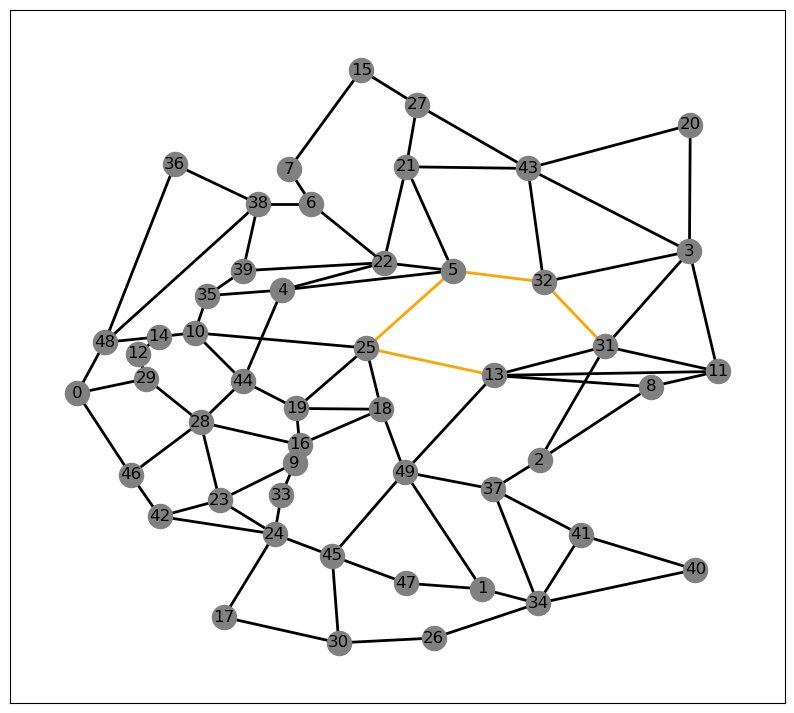

In [29]:
fig,ax = plt.subplots(figsize=(10,9))

options = {
    'node_size': 300,
    'node_color': 'gray',
    "width": 2,
    "edge_color": ["orange" if edge in djk_path else "black" for edge in g_base.edges]
}

nx.draw_networkx(g_base, pos, ax, **options)

In [15]:
sht_path_nodes = nx.shortest_path(g_base, s,t)

sht_path_edges = []
for ind,val in enumerate(sht_path_nodes[:-1]):
    for i in srlgs:
        if len(i) == 1:
            if (val in list(i)[0]) & (sht_path_nodes[ind+1] in list(i)[0]):
                sht_path_edges.append(list(i)[0])
            else:
                continue
        else:
            continue

sht_err_prob = np.sum([get_srlg_cfp(srlgs, srlg_probs, {i}) for i in sht_path_edges]) - math.prod([get_srlg_cfp(srlgs, srlg_probs, {i}) for i in sht_path_edges])
djk_err_prob = np.sum([get_srlg_cfp(srlgs, srlg_probs, {i}) for i in djk_path[1:-1]]) - math.prod([get_srlg_cfp(srlgs, srlg_probs, {i}) for i in djk_path[1:-1]])

print(sht_err_prob, djk_err_prob, round(djk_err_prob / sht_err_prob * 100, 2))

0.0 9.828983871457802e-07 inf


C:\Users\revis\AppData\Local\Temp\ipykernel_16416\1448616282.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  print(sht_err_prob, djk_err_prob, round(djk_err_prob / sht_err_prob * 100, 2))


In [10]:
def probability_union(probabilities):
    if not probabilities:
        return 0.0  # If the list is empty, the union probability is 0

    # Initialize with the first probability value
    result = probabilities[0]

    for prob in probabilities[1:]:
        result += prob - result * prob  # Inclusion-Exclusion Principle

    return result

In [11]:
print("--- Shortest path results ---")
print(probability_union([get_srlg_cfp(srlgs, srlg_probs, {i}) for i in sht_path_edges]))
print(np.prod([1 - get_srlg_cfp(srlgs, srlg_probs, {i}) for i in sht_path_edges]))
print("\n")
print("--- Dijktra results ---")
print(probability_union([get_srlg_cfp(srlgs, srlg_probs, {i}) for i in djk_path[1:-1]]))
print(np.prod([1- get_srlg_cfp(srlgs, srlg_probs, {i}) for i in djk_path[1:-1]]))

--- Shortest path results ---
0.007348883029319828
0.9926511169706802


--- Dijktra results ---
0.005802173830424943
0.9941978261695752
